In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
df = pd.read_csv('/Users/lichiaoyu/Downloads/heart copy.csv')

In [15]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
df.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

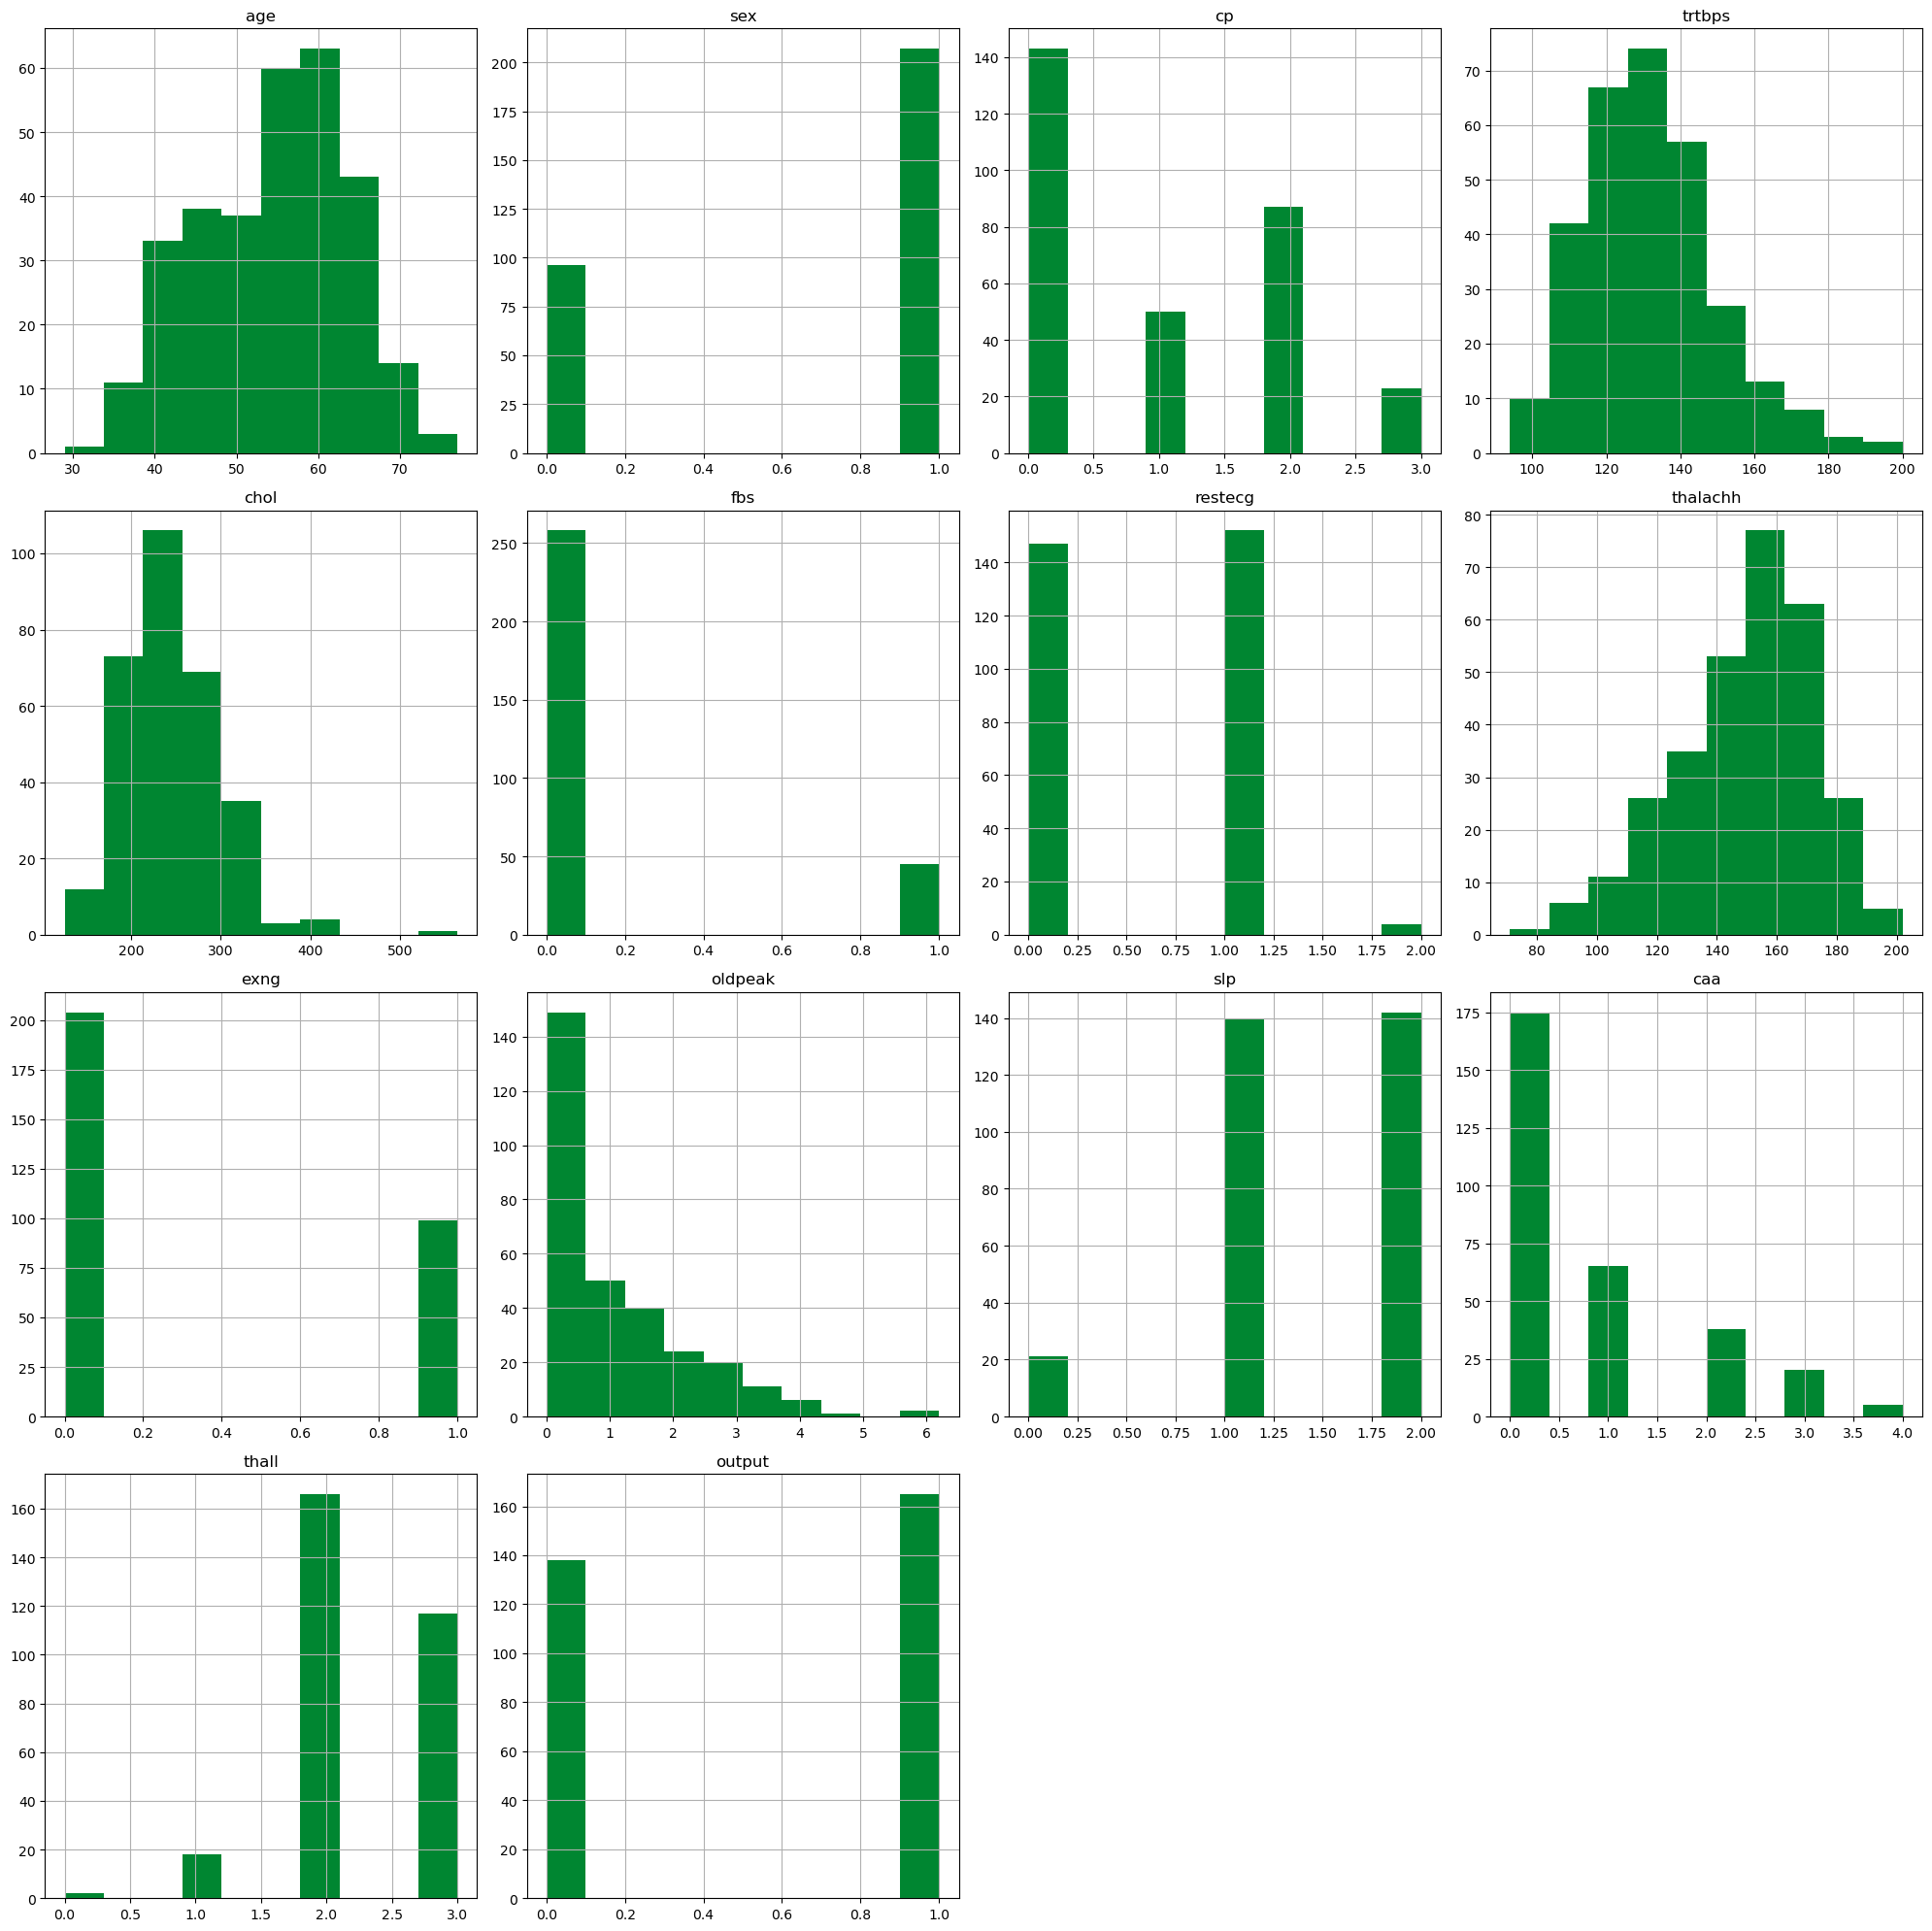

In [19]:
df.hist(figsize = (20,20),color='#008631')
plt.tight_layout()
plt.show()

In [25]:
Hdislabel = ['Have heart disease','Do not have heart disease']
val_counts = [508,409] 
fig = px.pie(values=val_counts,names=Hdislabel,
             color=Hdislabel,
             color_discrete_map={'Have heart disease':'red',
                                 'Do not have heart disease':'#008631'},
             title='Heart disease count')

fig.show()

<Figure size 1000x1000 with 0 Axes>

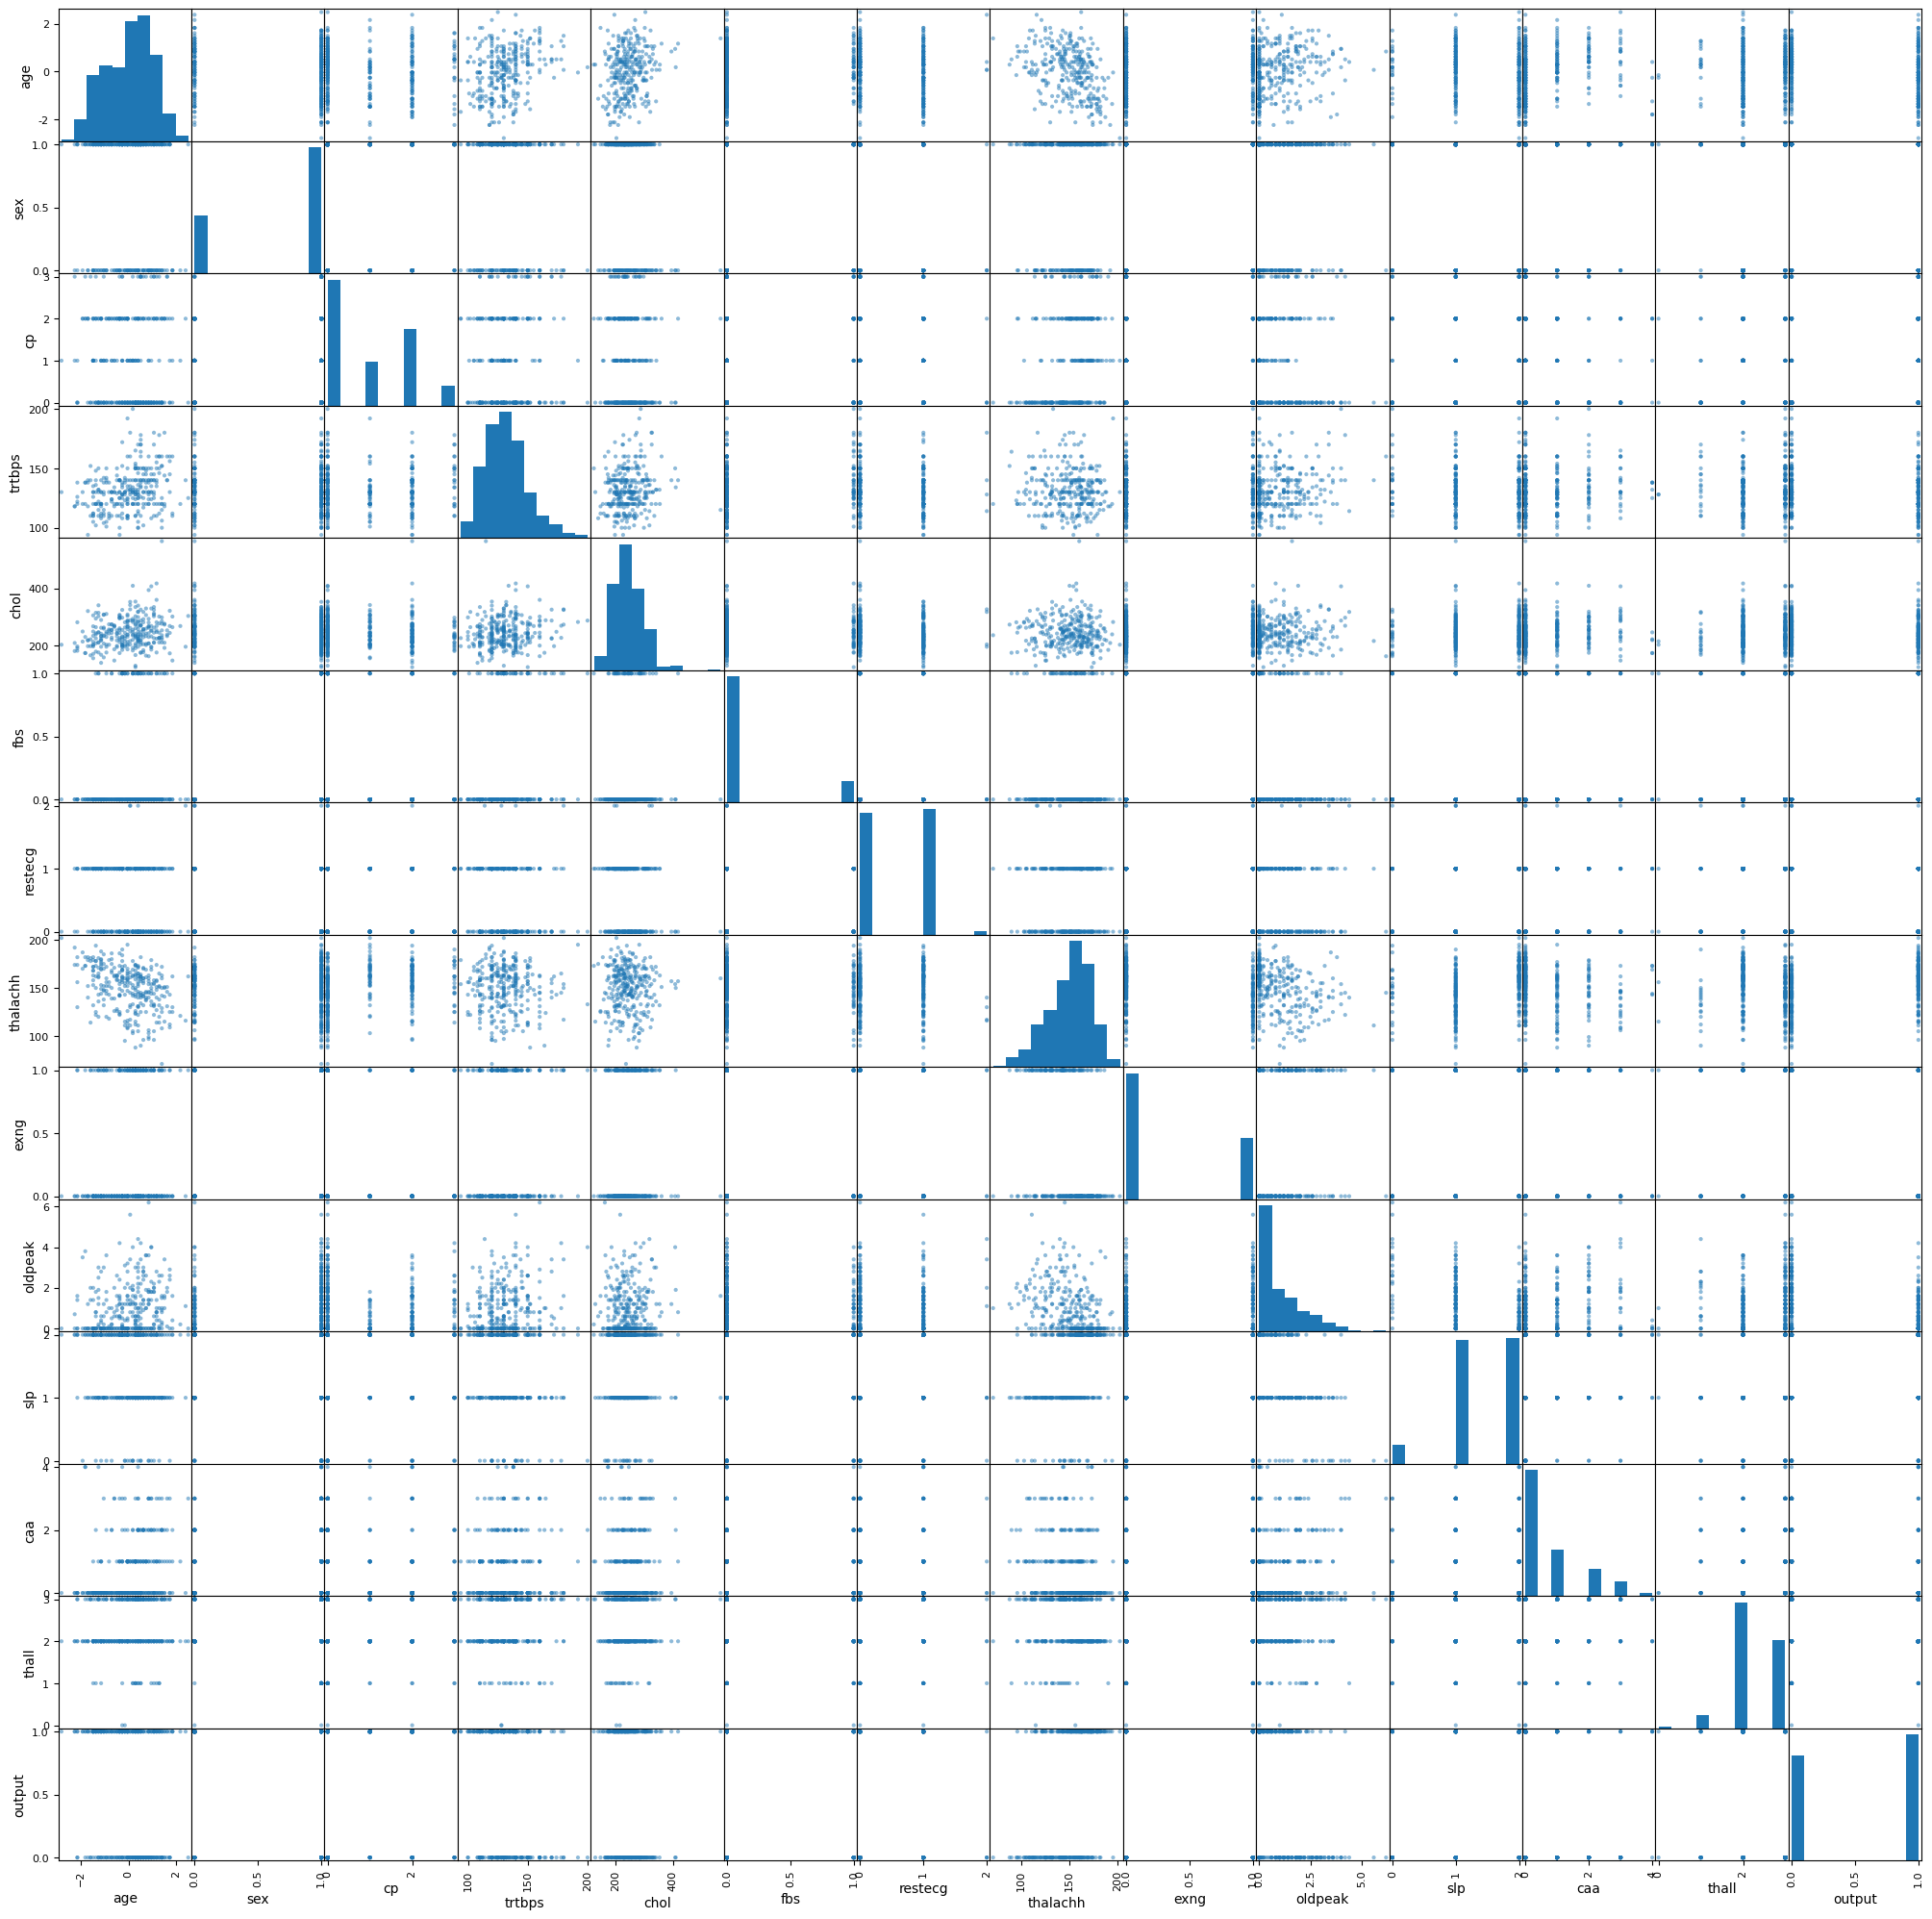

In [27]:
plt.figure(figsize=(10,10))
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))

Text(0.5, -0.23, 'Fig: Annoted values of correlation coefficient of each pair of features')

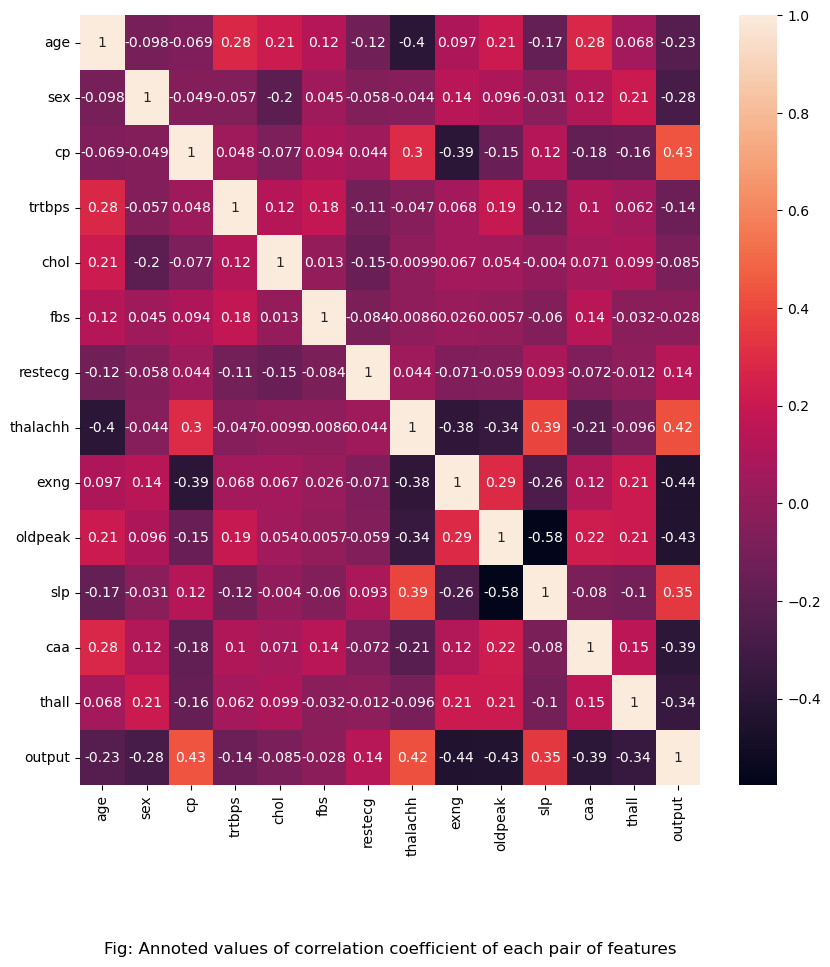

In [28]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(),annot=True)
plt.title('Fig: Annoted values of correlation coefficient of each pair of features', y=-0.23)

In [31]:
X = df.drop('output',axis=1)
Y = df['output']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
gaussNB = GaussianNB()

In [44]:
# Train the model
gaussNB.fit(X_train,Y_train)

GaussianNB()

In [45]:
Y_pred_nb = gaussNB.predict(X_test)

In [46]:
print('The value of accuracy score is ',accuracy_score(Y_test,Y_pred_nb))

The value of accuracy score is  0.881578947368421
